In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/content/BreadBasket_DMS.csv')
df.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [3]:
# cek tipe data dari setiap kolom
print('Dataset Information: \n')
print(df.info())

Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB
None


In [4]:
# mencetak 10 data pertama
print('First Ten Rows of the DataFrame: \n')
print(df.head(10))

First Ten Rows of the DataFrame: 

         Date      Time  Transaction           Item
0  2016-10-30  09:58:11            1          Bread
1  2016-10-30  10:05:34            2   Scandinavian
2  2016-10-30  10:05:34            2   Scandinavian
3  2016-10-30  10:07:57            3  Hot chocolate
4  2016-10-30  10:07:57            3            Jam
5  2016-10-30  10:07:57            3        Cookies
6  2016-10-30  10:08:41            4         Muffin
7  2016-10-30  10:13:03            5         Coffee
8  2016-10-30  10:13:03            5         Pastry
9  2016-10-30  10:13:03            5          Bread


In [5]:
#Mencetak data item yang unik (memiliki nilai item berbeda)
print('Unique Items: ', df['Item'].nunique())


Unique Items:  95


In [6]:
print( '\n', df['Item'].unique())


 ['Bread' 'Scandinavian' 'Hot chocolate' 'Jam' 'Cookies' 'Muffin' 'Coffee'
 'Pastry' 'Medialuna' 'Tea' 'NONE' 'Tartine' 'Basket' 'Mineral water'
 'Farm House' 'Fudge' 'Juice' "Ella's Kitchen Pouches" 'Victorian Sponge'
 'Frittata' 'Hearty & Seasonal' 'Soup' 'Pick and Mix Bowls' 'Smoothies'
 'Cake' 'Mighty Protein' 'Chicken sand' 'Coke' 'My-5 Fruit Shoot'
 'Focaccia' 'Sandwich' 'Alfajores' 'Eggs' 'Brownie' 'Dulce de Leche'
 'Honey' 'The BART' 'Granola' 'Fairy Doors' 'Empanadas' 'Keeping It Local'
 'Art Tray' 'Bowl Nic Pitt' 'Bread Pudding' 'Adjustment' 'Truffles'
 'Chimichurri Oil' 'Bacon' 'Spread' 'Kids biscuit' 'Siblings'
 'Caramel bites' 'Jammie Dodgers' 'Tiffin' 'Olum & polenta' 'Polenta'
 'The Nomad' 'Hack the stack' 'Bakewell' 'Lemon and coconut' 'Toast'
 'Scone' 'Crepes' 'Vegan mincepie' 'Bare Popcorn' 'Muesli' 'Crisps'
 'Pintxos' 'Gingerbread syrup' 'Panatone' 'Brioche and salami'
 'Afternoon with the baker' 'Salad' 'Chicken Stew' 'Spanish Brunch'
 'Raspberry shortbread sandwic

In [7]:
# Cek missing value dan zeros
print(df.isnull().sum().sort_values(ascending=False))

Date           0
Time           0
Transaction    0
Item           0
dtype: int64


In [8]:
# cek nilai "NONE" pada kolom Item
print(df[df['Item']=='NONE'])

             Date      Time  Transaction  Item
26     2016-10-30  10:27:21           11  NONE
38     2016-10-30  10:34:36           15  NONE
39     2016-10-30  10:34:36           15  NONE
66     2016-10-30  11:05:30           29  NONE
80     2016-10-30  11:37:10           37  NONE
...           ...       ...          ...   ...
21108  2017-04-08  11:54:22         9590  NONE
21122  2017-04-08  12:58:25         9599  NONE
21254  2017-04-09  12:01:07         9666  NONE
21255  2017-04-09  12:04:13         9667  NONE
21266  2017-04-09  12:31:28         9672  NONE

[786 rows x 4 columns]


In [9]:
# menghapus baris dengan nilai Item = None
df.drop(df[df['Item']=='NONE'].index, inplace=True)

In [10]:
# cek perubahan yang terjadi
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20507 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         20507 non-null  object
 1   Time         20507 non-null  object
 2   Transaction  20507 non-null  int64 
 3   Item         20507 non-null  object
dtypes: int64(1), object(3)
memory usage: 801.1+ KB
None


In [12]:
# Year (ingat kembali penulisan function lambda)
df['Year'] = df['Date'].apply(lambda x: x.split("-")[0])
# Month
df['Month'] = df['Date'].apply(lambda x: x.split("-")[1])
# Day
df['Day'] = df['Date'].apply(lambda x: x.split("-")[2])

In [13]:
# cek kembali perubahan yang terjadi setelah nilai tahun, bulan dan hari ditampung di fitur baru (year, month, day)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20507 entries, 0 to 21292
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         20507 non-null  object
 1   Time         20507 non-null  object
 2   Transaction  20507 non-null  int64 
 3   Item         20507 non-null  object
 4   Year         20507 non-null  object
 5   Month        20507 non-null  object
 6   Day          20507 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.3+ MB
None
         Date      Time  Transaction           Item  Year Month Day
0  2016-10-30  09:58:11            1          Bread  2016    10  30
1  2016-10-30  10:05:34            2   Scandinavian  2016    10  30
2  2016-10-30  10:05:34            2   Scandinavian  2016    10  30
3  2016-10-30  10:07:57            3  Hot chocolate  2016    10  30
4  2016-10-30  10:07:57            3            Jam  2016    10  30


In [17]:
# Mencetak 20 data penjualan item terbanyak
most_sold = df['Item'].value_counts().head(30)

print('Most Sold Items: \n')
print(most_sold)

Most Sold Items: 

Coffee               5471
Bread                3325
Tea                  1435
Cake                 1025
Pastry                856
Sandwich              771
Medialuna             616
Hot chocolate         590
Cookies               540
Brownie               379
Farm House            374
Muffin                370
Alfajores             369
Juice                 369
Soup                  342
Scone                 327
Toast                 318
Scandinavian          277
Truffles              193
Coke                  185
Spanish Brunch        172
Fudge                 159
Baguette              152
Jam                   149
Tiffin                146
Mineral water         136
Jammie Dodgers        125
Chicken Stew          123
Hearty & Seasonal     107
Salad                  99
Name: Item, dtype: int64


In [18]:
transaction_count = df.groupby(by='Item')[['Transaction']].count().sort_values(by='Transaction', ascending=False)
def convert_to_percentage(x):
    return 100 * x / float(x.sum())

transaction_percentage = transaction_count.apply(convert_to_percentage)
transaction_percentage.head()

,Transaction
Item,
Coffee,26.678695
Bread,16.213976
Tea,6.997611
Cake,4.998293
Pastry,4.174184


In [59]:
df2 = pd.DataFrame(transaction_percentage.head(20))

In [60]:
df2

,Transaction
Item,
Coffee,26.678695
Bread,16.213976
Tea,6.997611
Cake,4.998293
Pastry,4.174184
Sandwich,3.759692
Medialuna,3.003852
Hot chocolate,2.877066
Cookies,2.633247


Text(0.5, 1.0, 'Items Most Sold')

<Figure size 1440x432 with 0 Axes>

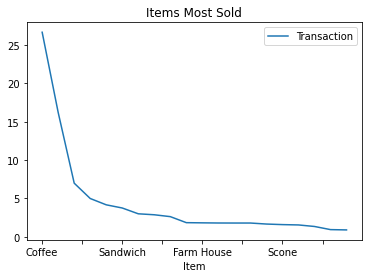

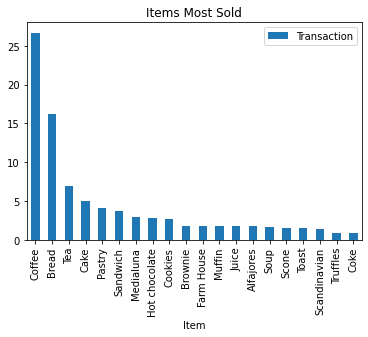

In [65]:
# visualisasikan data penjualan item terbanyak ke line chart dan bar chart
plt.figure(figsize=(20,6))


df2.plot(kind='line')
plt.title('Items Most Sold')

df2.plot(kind='bar')
plt.title('Items Most Sold')

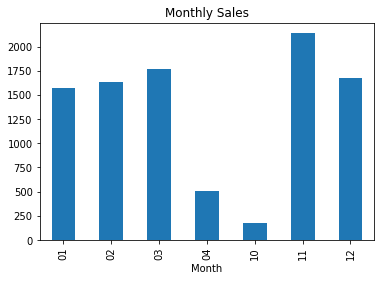

In [67]:
df.groupby('Month')['Transaction'].nunique().plot(kind='bar', title='Monthly Sales')
plt.show()

In [68]:
print(df.groupby('Month')['Day'].nunique())

Month
01    30
02    28
03    31
04     9
10     2
11    30
12    29
Name: Day, dtype: int64


In [69]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

In [71]:
transaction_list = []

# For loop to create a list of the unique transactions throughout the dataset:
for i in df['Transaction'].unique():
    tlist = list(set(df[df['Transaction']==i]['Item']))
    if len(tlist)>0:
        transaction_list.append(tlist)
print(len(transaction_list))

9465


In [74]:
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
df3 = pd.DataFrame(te_ary, columns=te.columns_)

In [76]:
frequent_itemsets = apriori(df3, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)
metrix = pd.DataFrame(rules)
metrix[['antecedents','consequents', 'support', 'confidence', 'lift']].sort_values('lift', ascending=False)

,antecedents,consequents,support,confidence,lift
40,(Cake),"(Coffee, Tea)",0.010037,0.096643,1.937977
39,"(Coffee, Tea)",(Cake),0.010037,0.201271,1.937977
8,(Hot chocolate),(Cake),0.011410,0.195652,1.883874
9,(Cake),(Hot chocolate),0.011410,0.109868,1.883874
11,(Tea),(Cake),0.023772,0.166667,1.604781
10,(Cake),(Tea),0.023772,0.228891,1.604781
30,(Coffee),(Toast),0.023666,0.049470,1.472431
31,(Toast),(Coffee),0.023666,0.704403,1.472431
37,(Pastry),"(Bread, Coffee)",0.011199,0.130061,1.444872
36,"(Bread, Coffee)",(Pastry),0.011199,0.124413,1.444872
